In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# text summarization

In [3]:
df = pd.read_json(open("data/text_summarization_result.txt", "r", encoding="utf8"), lines=True)

In [4]:
# nested dict to dataframe
show_wp = ["No Watermark", "$\delta$-reweight", "$\gamma$-reweight"]
john_wps_set = set()


def map_wp_str(wp_str):
    if "Delta" in wp_str:
        return show_wp[1]
    elif "Gamma" in wp_str:
        return show_wp[2]
    elif "John" in wp_str:
        import re

        delta = re.findall(r"delta=(\d+\.?\d*)", wp_str)[0]
        n = "Soft Red List" + f"($\delta$={delta})"
        john_wps_set.add(n)
        return n
    if wp_str == "None":
        return show_wp[0]
    else:
        raise ValueError("Unknown watermark: {}".format(wp_str))

df = df.assign(wp_str=df["watermark_processor"].apply(map_wp_str))
john_wps = sorted(list(john_wps_set))
df.head()

,rouge1,rouge2,rougeL,id,watermark_processor,bertscore.precision,bertscore.recall,bertscore.f1,wp_str
0,0.487179,0.157895,0.307692,000571afe702684d90c1d222ce70b1e1375c1016,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.304931,0.436858,0.369627,$\gamma$-reweight
1,0.450000,0.220339,0.316667,000642916e3a6c33411c617cf2f3c134a206fba8,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.367165,0.360996,0.365016,$\gamma$-reweight
2,0.426230,0.233333,0.196721,00110802bc6eae0e8e4d3d22e27f458f41be2b22,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.385283,0.384966,0.386034,$\gamma$-reweight
3,0.390244,0.225000,0.365854,00119229166ae09a6ef25c0e10b101ef9eb9cca3,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.416337,0.534256,0.474405,$\gamma$-reweight
4,0.351852,0.075472,0.166667,0013aa16650fbcfbe6edb16ac614ad174cb5d1cf,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.274321,0.246350,0.261323,$\gamma$-reweight


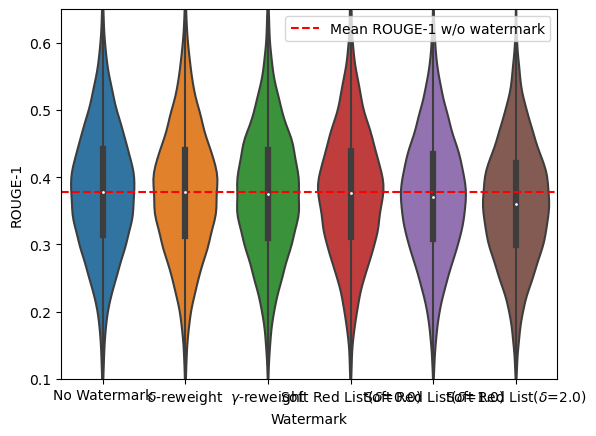

In [5]:
import seaborn as sns

sns.violinplot(
    data=df, x="wp_str", y="rouge1", order=show_wp + john_wps
)
plt.ylabel("ROUGE-1")
plt.xlabel("Watermark")
plt.axhline(df[df.wp_str == "No Watermark"].rouge1.mean(), color="red", linestyle="--", label="Mean ROUGE-1 w/o watermark")
plt.ylim(0.1, 0.65)
plt.legend()

In [6]:
sdf=df.melt(
    id_vars=["wp_str"],
    value_vars=[c for c in df.columns if df[c].dtype == np.float64],
    var_name="score",
    value_name="value",
)
sdf = sdf.groupby(["wp_str", "score"]).agg(["mean", "std", "count"])
sdf = (
    sdf["value"]
    .apply(
        lambda x: "{:.4f}±{:.4f}".format(x["mean"], x["std"] / np.sqrt(x["count"])),
        axis=1,
    )
    .unstack()
)
sdf = sdf.loc[show_wp + john_wps]
sdf

score,bertscore.f1,bertscore.precision,bertscore.recall,rouge1,rouge2,rougeL
wp_str,,,,,,
No Watermark,0.3185±0.0008,0.3065±0.0009,0.3306±0.0009,0.3786±0.0009,0.1339±0.0007,0.2390±0.0007
$\delta$-reweight,0.3180±0.0008,0.3067±0.0009,0.3294±0.0010,0.3778±0.0009,0.1335±0.0008,0.2396±0.0008
$\gamma$-reweight,0.3164±0.0008,0.3053±0.0009,0.3277±0.0009,0.3757±0.0009,0.1322±0.0007,0.2371±0.0007
Soft Red List($\delta$=0.0),0.3169±0.0008,0.3051±0.0009,0.3288±0.0010,0.3757±0.0009,0.1322±0.0007,0.2376±0.0007
Soft Red List($\delta$=1.0),0.3119±0.0008,0.2950±0.0009,0.3292±0.0009,0.3713±0.0009,0.1272±0.0007,0.2322±0.0007
Soft Red List($\delta$=2.0),0.2994±0.0008,0.2748±0.0008,0.3246±0.0009,0.3609±0.0008,0.1160±0.0006,0.2209±0.0007


# translation

In [7]:
df = pd.read_json(open("data/machine_translation_result.txt", "r", encoding="utf8"), lines=True)

In [8]:
df = df.assign(wp_str=df["watermark_processor"].apply(map_wp_str))
df.head()

,id,watermark_processor,bertscore.precision,bertscore.recall,bertscore.f1,wp_str
0,00000cc4b34abd31962fa6cc71c62f5e20e2afdc,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.617811,0.542633,0.580193,$\delta$-reweight
1,00030300e8d319dcd094e6a1e3fc10eb2d268d8a,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.327626,0.574252,0.444357,$\delta$-reweight
2,000308a0a2d574721438c1312e086e0b75611b0f,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.410875,0.383688,0.398079,$\delta$-reweight
3,000388db62ed74a41b17ba476a65dd12174bf20d,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.418802,0.538957,0.477922,$\delta$-reweight
4,0003fcd76a6948025e1217bfa8e3a00c63e76208,WatermarkLogitsProcessor(b'ke\xa6\xa4\x8b\x81H...,0.065481,0.064318,0.066282,$\delta$-reweight


(-0.5, 1.1895161283755353)

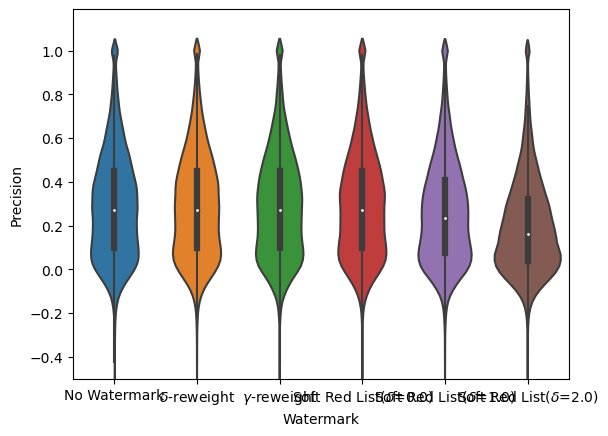

In [9]:
import seaborn as sns

sns.violinplot(
    data=df, x="wp_str", y="bertscore.precision", order=show_wp + john_wps
)
plt.ylabel("Precision")
plt.xlabel("Watermark")
plt.ylim(-0.5, None)

In [10]:
sdf=df.melt(
    id_vars=["wp_str"],
    value_vars=[c for c in df.columns if df[c].dtype == np.float64],
    var_name="score",
    value_name="value",
)
ndf = pd.read_json(open("data/machine_translation_bleu.txt", "r", encoding="utf8"), lines=True)
ndf = ndf.assign(wp_str=ndf["watermark_processor"].apply(map_wp_str))
ndf=ndf.melt(
    id_vars=["wp_str"],
    value_vars=[c for c in ndf.columns if ndf[c].dtype == np.float64],
    var_name="score",
    value_name="value",
)
sdf = pd.concat([sdf, ndf])
sdf = sdf.groupby(["wp_str", "score"]).agg(["mean", "std", "count"])
sdf = (
    sdf["value"]
    .apply(
        lambda x: "{:.4f}±{:.4f}".format(x["mean"], x["std"] / np.sqrt(x["count"])),
        axis=1,
    )
    .unstack()
)
sdf = sdf.loc[show_wp + john_wps]
sdf

score,bertscore.f1,bertscore.precision,bertscore.recall,bleu
wp_str,,,,
No Watermark,0.3039±0.0010,0.2905±0.0010,0.3183±0.0010,9.2389±0.0342
$\delta$-reweight,0.3041±0.0010,0.2911±0.0010,0.3180±0.0010,9.3019±0.0355
$\gamma$-reweight,0.3043±0.0010,0.2910±0.0010,0.3185±0.0010,9.3467±0.0364
Soft Red List($\delta$=0.0),0.3049±0.0010,0.2915±0.0010,0.3193±0.0010,9.3018±0.0384
Soft Red List($\delta$=1.0),0.2785±0.0010,0.2614±0.0010,0.2966±0.0010,8.1394±0.0327
Soft Red List($\delta$=2.0),0.2203±0.0009,0.1960±0.0009,0.2460±0.0009,5.5725±0.0292
